## Notes
忽略Keras RL的部分。Stable-baselines在下面  
这个现在用的是gym 0.26.2, 在monitor.py里有一个return的问题可能需要更改return的value数量才能兼容  
PPO感觉挺好的，在只120步的时候可以超过random选择的return。DQN在训练120步的时候不行。

## Keras RL DQN

In [1]:
!pip install -e disneyenv

Obtaining file:///gpfs/data/oermannlab/users/hz2212/DS-GA%203001-007/disneyenv
  Preparing metadata (setup.py) ... done
  Attempting uninstall: disneyenv
    Found existing installation: disneyenv 0.0.1
    Uninstalling disneyenv-0.0.1:
      Successfully uninstalled disneyenv-0.0.1
  Running setup.py develop for disneyenv


In [2]:
import gymnasium as gym
import disneyenv

env = gym.make('disneyenv/Disney-v0') 


/gpfs/data/oermannlab/users/hz2212/DS-GA 3001-007/disneyenv/disneyenv/envs/disney.py:42: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  self.waittime = pd.read_csv(


AssertionError: action space does not inherit from `gymnasium.spaces.Space`, actual type: <class 'gym.spaces.discrete.Discrete'>

In [ ]:
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input,Dropout,Reshape
from tensorflow.keras.optimizers import Adam

from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [4]:
def build_model(input_shape, output_shape):
    model = Sequential([
        Dense(512,activation="relu",input_shape = (1,input_shape)),
        Dropout(0.2),
        Flatten(),
        Dense(256,activation = "relu"),
        Dropout(0.2),
        Dense(128,activation = "relu"),
        Dense(64,activation = "relu"),
        Dense(output_shape,activation = "linear"),
        Flatten()
    ])
    model.summary()
    return model

In [5]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=2000,window_length = 1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg',
                  nb_actions=actions, nb_steps_warmup=10)
    return dqn

In [6]:
model = build_model(env.observation_space.n,env.action_space.n)
dqn_agent = build_agent(model,env.action_space.n)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 512)            118784    
                                                                 
 dropout (Dropout)           (None, 1, 512)            0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [7]:
dqn_agent.compile(Adam(learning_rate=0.001))

In [8]:
dqn_agent.fit(env, nb_steps = 1000, visualize = False, verbose = 1) 

Training for 1000 steps ...


c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:174: UserWarning: WARN: Future gymnasium versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:187: UserWarning: WARN: Future gymnasium versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(


A new day! Today is 2018-7-26
Interval 1 (0 steps performed)


c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    1/10000 [..............................] - ETA: 1:21:38 - reward: 1.0000

c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:133: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'numpy.ndarray'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


   11/10000 [..............................] - ETA: 46:40 - reward: -35.2727

c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


 1000/10000 [==>...........................] - ETA: 49:28 - reward: -29.2526done, took 330.622 seconds


## Agent without RL

In [4]:
!pip install -e disneyenv

Obtaining file:///C:/Users/82751/OneDrive/Desktop/NYU/Reinforcement%20Learning/DS-GA-3001-007-Final-Project/disneyenv
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: disneyenv
    Found existing installation: disneyenv 0.0.1
    Uninstalling disneyenv-0.0.1:
      Successfully uninstalled disneyenv-0.0.1
  Running setup.py develop for disneyenv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
import disneyenv

In [2]:
env = gym.make("disneyenv/Disney-v0")

### Random

In [ ]:
obs = env.reset()
episode_return = []
while True:
    action = obs.action_space.sample
    obs, reward, done, info = env.step(action)
    print("at",env.current_time," the agent go to ride ",env.current_location,"in current land",env.current_land,"and get a reward of",reward)

    episode_return += [reward]
    if (done):
        obs = env.reset()
        break

### Deterministic

In [7]:
# A deterministic agent
obs = env.reset()
reward_arr = env.ridesinfo.popularity.apply(lambda x:  5 if type(x)!=str else env.reward_dict[x]).to_numpy()

def get_action(obs,reward_arr=reward_arr):
    indicies = np.where((obs["operationStatus"]  + ~obs["pastActions"]) == 2)[0]
    if len(indicies) == 0:
        return 106
    
    wait_arr = obs["waitTime"][indicies]
    reward_arr = reward_arr[indicies]
    tmp = np.argmax([reward/wait if wait != 0 else reward for wait,reward in zip(wait_arr,reward_arr)])

    action = indicies[tmp]
    return action


episode_return = []
while True:
    action = get_action(obs)
    obs, reward, done, info = env.step(action)
    print("at",env.current_time," the agent go to ride ",env.current_location,"in current land",env.current_land,"and get a reward of",reward)

    episode_return += [reward]
    if (done):
        obs = env.reset()
        break


A new day! Today is 2018-03-29
at 2018-03-29 08:12:38.425107  the agent go to ride  11 in current land 1 and get a reward of 19.68595815464862
at 2018-03-29 08:33:38.425107  the agent go to ride  12 in current land 1 and get a reward of 19.9
at 2018-03-29 08:55:28.854042  the agent go to ride  38 in current land 4 and get a reward of 19.71595177523095
at 2018-03-29 09:10:52.422618  the agent go to ride  65 in current land 8 and get a reward of 19.710719039255316
at 2018-03-29 09:31:58.194264  the agent go to ride  83 in current land 10 and get a reward of 19.090380590370867
at 2018-03-29 09:55:10.443845  the agent go to ride  48 in current land 5 and get a reward of 18.57958403133405
at 2018-03-29 10:21:51.364237  the agent go to ride  90 in current land 12 and get a reward of 19.33179934618687
at 2018-03-29 10:50:50.298196  the agent go to ride  4 in current land 0 and get a reward of 9.301776734439997
at 2018-03-29 11:48:25.837328  the agent go to ride  23 in current land 2 and get a

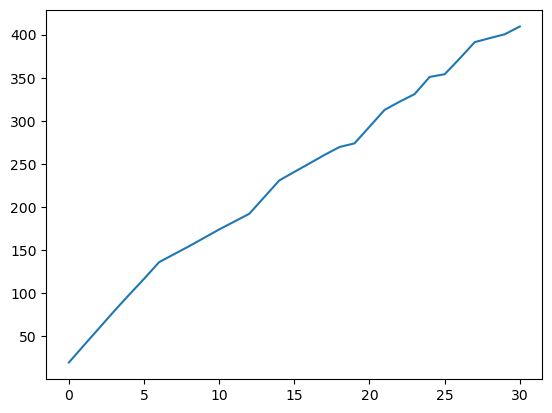

In [8]:
plt.plot(np.arange(len(episode_return)),np.cumsum(episode_return))

## Stable Baseline3 DQN 

In [1]:
!pip install -e disneyenv

Obtaining file:///gpfs/data/oermannlab/users/hz2212/DS-GA%203001-007/disneyenv
  Preparing metadata (setup.py) ... done
  Attempting uninstall: disneyenv
    Found existing installation: disneyenv 0.0.1
    Uninstalling disneyenv-0.0.1:
      Successfully uninstalled disneyenv-0.0.1
  Running setup.py develop for disneyenv


In [1]:
import gym
import disneyenv
import torch

from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback, CallbackList, ProgressBarCallback
from stable_baselines3 import PPO, DQN
from wandb.integration.sb3 import WandbCallback

import wandb
import numpy as np

In [10]:
def get_train_env(i):
    train_env = gym.make("disneyenv/Disney-v0", train=True)
    train_env = Monitor(train_env, filename="./monitor_logs/train", info_keywords=("current_date",))
    return train_env

def get_eval_env(i):
    eval_env = gym.make("disneyenv/Disney-v0", train=False)
    eval_env = Monitor(eval_env, filename="./monitor_logs/eval", info_keywords=("current_date",))
    return eval_env

In [11]:
train_env = DummyVecEnv([lambda : get_train_env(x) for x in range(2)])
eval_env = DummyVecEnv([lambda : get_eval_env(x) for x in range(2)])

# run = wandb.init(project="disney_rl", name="disney_run", sync_tensorboard=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = PPO("MultiInputPolicy", train_env, verbose=1, device="cpu")
# agent = PPO("MultiInputPolicy",env,verbose=1, device=device, batch_size=1024, n_steps=1024)

Using cpu device

In [ ]:
eva

In [4]:
eval_callback = EvalCallback(eval_env, best_model_save_path="./eval_logs/",
             log_path="./eval_logs/", eval_freq=2, n_eval_episodes=15)

# wandb_callback = WandbCallback(
#             model_save_path=f"models/{run.id}",
#             model_save_freq=100,
#             verbose=2,
#         )

pb_callback = ProgressBarCallback()

In [5]:
model.learn(total_timesteps=10000, callback=CallbackList([eval_callback, pb_callback]))


Output()

KeyboardInterrupt: 

In [4]:
obs = env.reset()
return_val = []
while True:
    action, _states = agent.predict(obs, deterministic=False)
    #action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print("at", env.current_time, "agent go to ride", action, "and get reward", reward)
    return_val += [reward]
    
    if done:
        print(return_val)
        break


A new day! Today is 2018-08-20

at 2018-08-20 08:07:20 agent go to ride 45 and get reward -1.4666666666666668

at 2018-08-20 08:08:20 agent go to ride 47 and get reward -0.2

at 2018-08-20 08:51:17 agent go to ride 67 and get reward -2.290000000000001

at 2018-08-20 09:23:26 agent go to ride 56 and get reward -0.8300000000000001

at 2018-08-20 09:27:13 agent go to ride 24 and get reward -0.7566666666666667

at 2018-08-20 09:46:06 agent go to ride 81 and get reward -3.776666666666667

at 2018-08-20 09:54:36 agent go to ride 77 and get reward 9.8

at 2018-08-20 11:33:19 agent go to ride 93 and get reward 1.456666666666667

at 2018-08-20 11:46:14 agent go to ride 91 and get reward -2.5833333333333335

at 2018-08-20 12:25:55 agent go to ride 94 and get reward 7.463333333333333

at 2018-08-20 13:11:55 agent go to ride 72 and get reward -1.8000000000000007

at 2018-08-20 14:52:08 agent go to ride 15 and get reward 13.356666666666666

at 2018-08-20 15:42:38 agent go to ride 11 and get reward 19.8

at 2018-08-20 16:14:20 agent go to ride 87 and get reward 7.66

at 2018-08-20 17:40:42 agent go to ride 80 and get reward 1.5266666666666664

at 2018-08-20 18:41:33 agent go to ride 9 and get reward 6.129999999999999

at 2018-08-20 19:18:53 agent go to ride 52 and get reward 3.333333333333333

at 2018-08-20 20:48:26 agent go to ride 88 and get reward 1.9899999999999998

at 2018-08-20 21:32:24 agent go to ride 52 and get reward -2.9933333333333336

The day is over! The reward is 52.806666666666665

at 2018-08-20 22:48:28 agent go to ride 93 and get reward -3.0133333333333336

[-1.4666666666666668, -0.2, -2.290000000000001, -0.8300000000000001, -0.7566666666666667, -3.776666666666667, 9.8, 
1.456666666666667, -2.5833333333333335, 7.463333333333333, -1.8000000000000007, 13.356666666666666, 19.8, 7.66, 
1.5266666666666664, 6.129999999999999, 3.333333333333333, 1.9899999999999998, -2.9933333333333336, 
-3.0133333333333336]